# Vẽ bounding box, kiểm tra nhãn

In [1]:
# from tensorflow import Tensor
# from tensorflow.image import draw_bounding_boxes
import numpy as np
# from tensorflow.keras.utils import image_dataset_from_directory
from cv2 import rectangle
from matplotlib.image import imsave, imread
from matplotlib.pyplot import subplots, close as fig_close, imshow, sca
# from gc import collect
# from matplotlib.pyplot import sca

In [2]:
img_size, img_size_cv = (720, 1280), (1280, 720)

In [9]:
# label_files = !ls dataset/base/labels/train/
label_files = !ls dataset/base/labels/val/
# label_files = !ls dataset/base/labels/public_test/
len(label_files)

184

In [2]:
# train_image_dir = '../data_centric_fpt/dataset/base/images/train'
# val_image_dir = '../data_centric_fpt/dataset/base/images/val'
# pub_test_image_dir = '../data_centric_fpt/dataset/base/images/public_test'
image_dir = {'train': '../data_centric_fpt/dataset/base/images/train',
            'val': '../data_centric_fpt/dataset/base/images/val',
            'public_test': '../data_centric_fpt/dataset/base/images/public_test'}

In [11]:
train_set = image_dataset_from_directory(image_dir, labels=None,
                                         shuffle=False, batch_size=1, image_size=img_size)

Found 184 files belonging to 1 classes.


In [4]:
label_colors = np.array([[255, 0, 0], [0, 255, 0], [255, 255, 0]], dtype=np.uint8)

In [3]:
# train_label_dir = 'labels/train'
# val_label_dir = 'labels/val'
# pub_test_label_dir = 'labels/public_test'
labels_dir = {'train': 'labels/train', 'val': 'labels/val', 'public_test': 'labels/public_test'}

In [12]:
# save_dir = 'dataset/bounding_box/train'
save_dir = 'dataset/bounding_box/val'

In [13]:
# labels_bounding_box = []
for (image, file) in zip(train_set, label_files):
    img_info = np.loadtxt(f'{label_dir}/{file}')
    if img_info.size == 0: continue
    img_info = np.atleast_2d(img_info)
    
    labels, box = img_info[:, 0], img_info[:, 1:]
    
    box[:, [0, 2]] *= img_size[1]
    box[:, [1, 3]] *= img_size[0]
    
    box[:, 0] -= box[:, 2] / 2
    box[:, 1] -= box[:, 3] / 2
    
    box[:, 2] += box[:, 0]
    box[:, 3] += box[:, 1]
    
    box[:, [0, 2]] /= img_size[1]
    box[:, [1, 3]] /= img_size[0]

    box = box[:, [1,0,3,2]]
    
    colors = label_colors[labels.reshape(-1).astype(int)]
    
    bb_img = draw_bounding_boxes(image, box.reshape((1, *box.shape)), colors=colors)
    end_id = file.find('.')
    imsave(f'{save_dir}/{file[:end_id]}.jpg', np.array(bb_img[0], dtype=np.uint8, copy=False))
    
    # if file == '450.txt':
    #     break
    collect()
    

/tmp/ipykernel_11202/3716389529.py:3: UserWarning: loadtxt: Empty input file: "dataset/base/labels/val/853.txt"
  img_info = np.loadtxt(f'{label_dir}/{file}')


In [25]:
file

'450.txt'

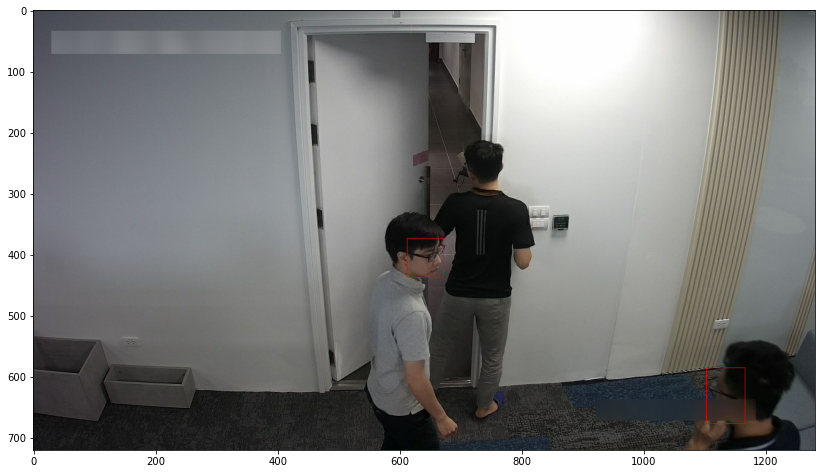

In [11]:
plt.subplots(figsize=(14, 10))
plt.imshow((bb_img[0].numpy().astype(int)))

# Xem lại những hình đã chỉnh sửa nhãn và đường bao - tập train

In [22]:
with open('dataset/base/labels/review_train.txt') as f:
    review_ls = f.read().split()    
review_ls

['243',
 '252',
 '251',
 '257',
 '259',
 '269',
 '285',
 '287',
 '288',
 '289',
 '297',
 '306',
 '307',
 '312',
 '313',
 '314',
 '315',
 '316',
 '317',
 '318',
 '319',
 '342',
 '341',
 '343',
 '346',
 '350',
 '411',
 '412',
 '413',
 '414',
 '415',
 '416',
 '417',
 '418',
 '419',
 '421',
 '426',
 '427',
 '430',
 '431',
 '432',
 '433',
 '434',
 '435',
 '436',
 '437',
 '438',
 '439',
 '440',
 '441',
 '442',
 '443',
 '444',
 '445',
 '446',
 '447',
 '448',
 '449',
 '450',
 '451',
 '452',
 '453',
 '454',
 '455',
 '456',
 '457',
 '458',
 '459',
 '460']

In [23]:
for fname in review_ls:
    !mv dataset/base/labels/train/{fname}.txt dataset/review/labels

In [18]:
# review_ls = ['313','316','318','319','421']
review_ls = [984,1006,1007,1008,1029,1036,1039,1042,1049]

In [19]:
labels_ls = []
for fname in review_ls:
    with open(f'dataset/base/labels/public_test/{fname}.txt') as f:
        labels_ls.append(f.read().split())
        
labels_ls

[['1',
  '0.740234',
  '0.924306',
  '0.071094',
  '0.137500',
  '1',
  '0.84609375',
  '0.49027777777777776',
  '0.04609375',
  '0.08888888888888889'],
 ['1',
  '0.293750',
  '0.745139',
  '0.054688',
  '0.101389',
  '0',
  '0.99375',
  '0.05',
  '0.01171875',
  '0.02361111111111111'],
 ['1',
  '0.893750',
  '0.665278',
  '0.042188',
  '0.094444',
  '1',
  '0.8953125',
  '0.008333333333333333',
  '0.01484375',
  '0.018055555555555554',
  '0',
  '0.9953125',
  '0.05138888888888889',
  '0.01171875',
  '0.020833333333333332'],
 ['1',
  '0.514062',
  '0.606250',
  '0.042188',
  '0.112500',
  '1',
  '0.90703125',
  '0.013888888888888888',
  '0.0125',
  '0.020833333333333332',
  '0',
  '0.99453125',
  '0.05',
  '0.01015625',
  '0.02361111111111111'],
 ['1',
  '0.917578',
  '0.286111',
  '0.028906',
  '0.094444',
  '1',
  '0.624219',
  '0.597917',
  '0.042188',
  '0.151389',
  '1',
  '0.598828',
  '0.410417',
  '0.027344',
  '0.079167',
  '0',
  '0.8515625',
  '0.3458333333333333',
  '0.0320

In [20]:
images_ls = []
for fname in review_ls:
    img = imread(f'dataset/base/images/public_test/{fname}.jpg')
    img = resize(img, dsize=img_size_cv)
    images_ls.append(img)

In [21]:
# labels_bounding_box = []
for (image, file, info) in zip(images_ls, review_ls, labels_ls):
    img_info = np.loadtxt(f'dataset/base/labels/train/{file}', ndmin=2)
    img_info = np.array(info, dtype=np.float64, copy=False).reshape(-1, 5)
    if img_info.size == 0: continue
    # img_info = np.atleast_2d(img_info)
    
    labels, box = img_info[:, 0], img_info[:, 1:]
    
    box[:, [0, 2]] *= img_size[1]
    box[:, [1, 3]] *= img_size[0]
    
    box[:, 0] -= box[:, 2] / 2
    box[:, 1] -= box[:, 3] / 2
    
    box[:, 2] += box[:, 0]
    box[:, 3] += box[:, 1]
    
    box[:, [0, 2]] /= img_size[1]
    box[:, [1, 3]] /= img_size[0]

    box = box[:, [1,0,3,2]]
    
    colors = label_colors[labels.reshape(-1).astype(int)]
    
    bb_img = draw_bounding_boxes(image.reshape((1, *image.shape)),
                                 box.reshape((1, *box.shape)), colors=colors)
    # end_id = file.find('.')
    imsave(f'dataset/bounding_box/public_test/{file}.jpg', np.array(bb_img[0], dtype=np.uint8, copy=False))
    
    collect()
    # break

# Lọc ra những hình có đối tượng thuộc lớp != 1

In [4]:
def get_aug_needed_images(dir):
    '''
    Hàm tìm những hình có đối tượng thuộc lớp khác 1 từ những tập nhãn.
    Giả định tên tập nhãn giống với tên tập tin hình.
    
    Đầu vào:
    --------
    dir: str
        đường dẫn tới tập nhãn của những bức hình cần tìm.
            
    Đầu ra:
    --------
    label_files: list
        danh sách những hình có đối tượng thuộc lớp khác 1.
    '''
    label_files = !ls {dir}
    rm_files = []
    for file in label_files:
        image_info = np.loadtxt(f'{dir}/{file}',ndmin=2)        
        if image_info.size == 0: 
            rm_files.append(file)
            continue
            
        # image_info = np.atleast_2d(image_info)        
        labels = image_info[:, 0]
        
        diff_label_one = np.where(labels != 1)[0]
        if diff_label_one.size == 0:
            rm_files.append(file)
            
    for file in rm_files:
        label_files.remove(file)
        
    return label_files

In [5]:
# train_labels_files = get_aug_needed_images(labels_dir['train'])
# val_labels_files = get_aug_needed_images(labels_dir['val'])
labels_files = {'train': get_aug_needed_images(labels_dir['train']),
               'val': get_aug_needed_images(labels_dir['val']),
               'public_test': get_aug_needed_images(labels_dir['public_test'])}

/tmp/ipykernel_3928/3806150769.py:19: UserWarning: loadtxt: Empty input file: "labels/val/853.txt"
  image_info = np.loadtxt(f'{dir}/{file}',ndmin=2)


In [6]:
list(map(len, labels_files.values()))

[359, 94, 44]

Cắt hình ở những đối tượng mong muốn và tính lại đường bao.

In [7]:
def image_crop(image, info):
    labels = info[:, 0] # truy xuất các nhãn của các đối tượng.
    crop_labels_ids = np.where(labels != 1)[0] # tìm chỉ mục những nhãn != 1
    # lấy kích thước ban đầu của hình, định dạng (rộng, cao)
    img_size = np.array([image.shape[1], image.shape[0]], copy=False)
    
    for label_id in crop_labels_ids:
        # tính tâm điểm và độ rộng, cao của đối tượng cần cắt
        # theo số điểm ảnh với kích thước ban đầu
        center_point = info[label_id,[1,2]] * img_size
        box_size = info[label_id,[3,4]] * img_size
        
        d_center = img_size / 4
        ratio = np.random.uniform(-0.8, 0.9, 2)
        d_shift = d_center * ratio
        
        top_left = center_point - d_center + d_shift
        bottom_right = center_point + d_center + d_shift
        
        complement = 0
        if top_left[0] < 0:
            complement = -top_left[0]
            top_left[0] = 0
            bottom_right[0] += complement
        elif bottom_right[0] > image.shape[1]:
            complement = bottom_right[0] - image.shape[1]
            bottom_right[0] = image.shape[1]
            top_left[0] -= complement
            
        if top_left[1] < 0:
            complement = -top_left[1]
            top_left[1] = 0
            bottom_right[1] += complement
        elif bottom_right[1] > image.shape[0]:
            complement = bottom_right[1] - image.shape[0]
            bottom_right[1] = image.shape[0]
            top_left[1] -= complement
            
        
        new_img_size = bottom_right - top_left
        new_center = (center_point - top_left) / new_img_size
        new_box_percentage = box_size / new_img_size
        
        new_info = [np.concatenate(([info[label_id, 0]], new_center, new_box_percentage))]
        
        for i in range(labels.size):
            if i == label_id:
                continue
                
            center_i = info[i, [1,2]] * img_size
            if np.all(top_left <= center_i) and np.all(center_i <= bottom_right):
                box_size = info[i,[3,4]] * img_size
                new_center = (center_i - top_left) / new_img_size
                new_box_percentage = box_size / new_img_size
                new_info.append(np.concatenate(([info[i, 0]], new_center, new_box_percentage)))
        
        top_left = top_left.round().astype(np.uint16)
        bottom_right = bottom_right.round().astype(np.uint16)
        yield image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]], new_info
              # np.concatenate((info[label_id, [0]],
              #                 new_center - box_size/2, new_center + box_size/2))\
              #   .round().astype(np.uint16)
                
        

In [6]:
image = imread(f'{train_image_dir}/68.jpg')
info = np.loadtxt(f'{train_label_dir}/68.txt')

[array([2.        , 0.89260544, 0.42043327, 0.109375  , 0.24722222])]
[array([0.        , 0.7359375 , 0.11111111, 0.0125    , 0.03888889]), array([1.        , 0.859375  , 0.025     , 0.01875   , 0.03888889])]


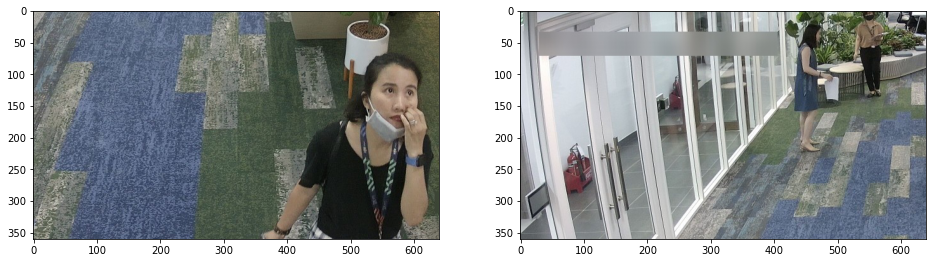

In [15]:
#kiểm tra cài đặt
fig, axes = subplots(ncols=2, figsize=(16,9))
for i, (crop_image, new_labels) in enumerate(image_crop(image, info)):
    sca(axes[i])
    # crop_image = draw_bounding_boxes()
    imshow(crop_image)
    # imshow(rectangle(crop_image, pt1=new_labels[1:3], pt2=new_labels[3:],
    #                  color=(255,255,0)))
    print(new_labels)

In [8]:
for directory in labels_files:
    for file in labels_files[directory]:
        image_name = file[:file.find('.')]
        image = imread(f'{image_dir[directory]}/{image_name}.jpg')
        info = np.loadtxt(f'{labels_dir[directory]}/{file}', ndmin=2)

        for i, (crop_image, new_labels) in enumerate(image_crop(image, info)):
            imsave(f'{image_dir[directory]}/{image_name}_crop{i}.jpg', crop_image)
            np.savetxt(f'{labels_dir[directory]}/{image_name}_crop{i}.txt', new_labels,
                      fmt='%u %f %f %f %f')